## NBA Game_Data Analysis
**Objective: Game Score Prediction**

- **Variables Information**
1. Player           : Name of the Player 
2. pos              : Positions played   
3. age              : Age of the players
4. bref_team_id     : team name
5. g                : numebr of game played  
6. gs               : game score   
7. mp               : minutes played
8. fg               : field goals
9. fga              : field goals attempts
10. fg.              : field goal percentage
11. x3p              : 3-point field goals
12. x3pa             : 3-point field goals attempt
13. x3p.             : 3-point field goals percentage
14. x2p              : 2-point field goals
15. x2pa             : 2-point field goals attempt
16. x2p.             : 2-point field goals percentage
17. efg.             : effective field goals percentage
18. ft               : free throws
19. fta              : free throws attempt
20. ft.              : free throws percentage
21. orb              : offensive rebounds
22. drb              : defensive rebounds
23. trb              : total rebounds
24. ast              : assits per game
25. stl              : steals per game
26. blk              : blocks per game
27. tov              : turnovers
28. pf               : personal fouls
29. pts              : Points 
30. season           : season (year) played the game
31. season_end       :

**Objectives:**
-  predict how many points NBA players Scored

##### Some Points noted from references

+ Naïve Bayes, artificial neural network, and Decision Tree

+ Based on the results analysis, the DRB (defensive rebounds) feature was chosen and was deemed as the most significant factor influencing the results of an NBA game. Furthermore, others crucial factors such as TPP (three-point percentage), FT (free throws made), and TRB (total rebounds) were also selected, which subsequently increased the model’s prediction accuracy rate by 2–4%.

+ feed-forward, radial basis and generalized regression Neural Networks. Fusion of the neural networks was also examined by using AdaBoost ensemble learning algorithm.

+ Further, we have explored which features set input to the neural network was the most useful ones for prediction. And an excellent prediction scheme was proposed to improve the forecast accuracy. 

+ By using AdaBoost and the proposed scheme, the accuracy of our prediction of the starting line up is up to 91.7%, the reserve line up 73.3%.

+ prediction as a Probabilistic matrix factorization problem 

+ what are the significant factors that affect the outcome of games.

### References
- https://link.springer.com/article/10.1007/s40745-018-00189-x
- https://ieeexplore.ieee.org/abstract/document/6973701
- https://dspace.mit.edu/handle/1721.1/106385
- https://www.basketball-reference.com/leagues/NBA_2014_per_game.html
- https://www.basketball-reference.com/leagues/NBA_2014.html
- https://www.k2analytics.co.in/outlier-treatment-in-python-and-r/

In [1]:
#import libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
##import data
data=pd.read_csv(r'C:\Users\hp\Downloads\nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
data.shape

(481, 31)

In [4]:
data.isnull().sum()  ## Checking missing values

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [5]:
data.info()     ## data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [6]:
data.head(1)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013


<AxesSubplot:xlabel='count', ylabel='pos'>

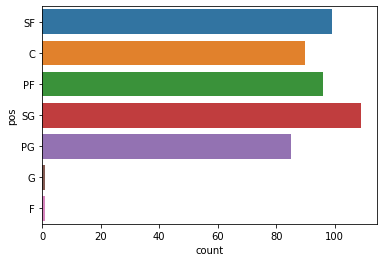

In [7]:
sns.countplot(y= "pos", data = data)

- The above plot shows that player don't prefer to play in 'G' and 'F' position. and most preferable position by player is 'SG'

In [8]:
grouped=pd.DataFrame(data.groupby(['pos','age'])['mp','g','gs'].sum().reset_index())
grouped

,pos,age,mp,g,gs
0,C,20,6536,271,170
1,C,21,7697,405,130
2,C,22,2013,131,9
3,C,23,7434,387,180
4,C,24,6004,436,66
...,...,...,...,...,...
89,SG,35,177,6,6
90,SG,36,1550,68,3
91,SG,37,3264,158,9
92,SG,38,1936,73,9


In [9]:
data.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

leb = LabelEncoder()


data['Pos_N']= leb.fit_transform(data['pos'])

In [11]:
data.describe()    # Description of data

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,drb,trb,ast,stl,blk,tov,pf,pts,season_end,Pos_N
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0,481.000000
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0,3.700624
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0,2.062002
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0,0.000000
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0,3.000000
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0,4.000000
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0,5.000000
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0,6.000000


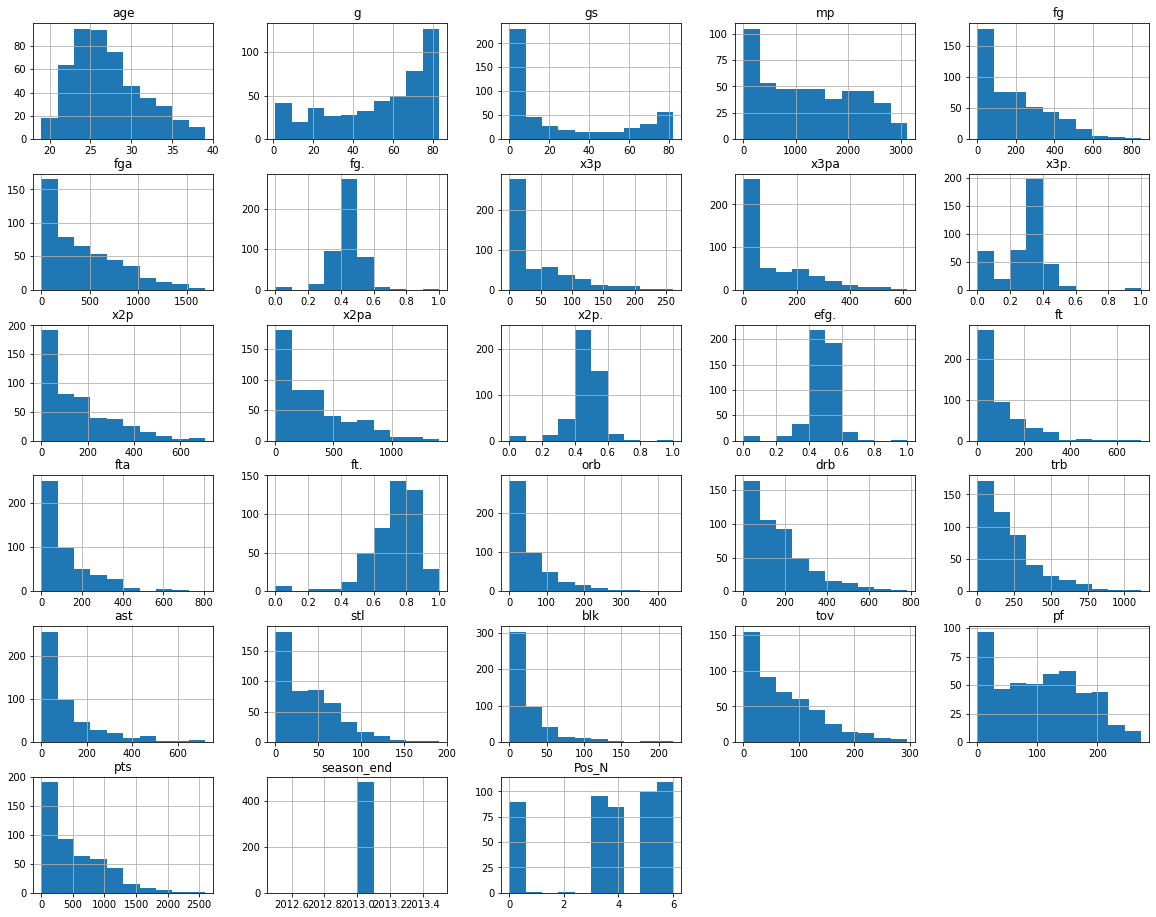

In [12]:
##Histogram of the data
data.hist(figsize=(20,16))
plt.show()

- Pos_N and season_end are categorical data, rest all are numerical type data. but from the graph we can visualiza that data are not normally distributed

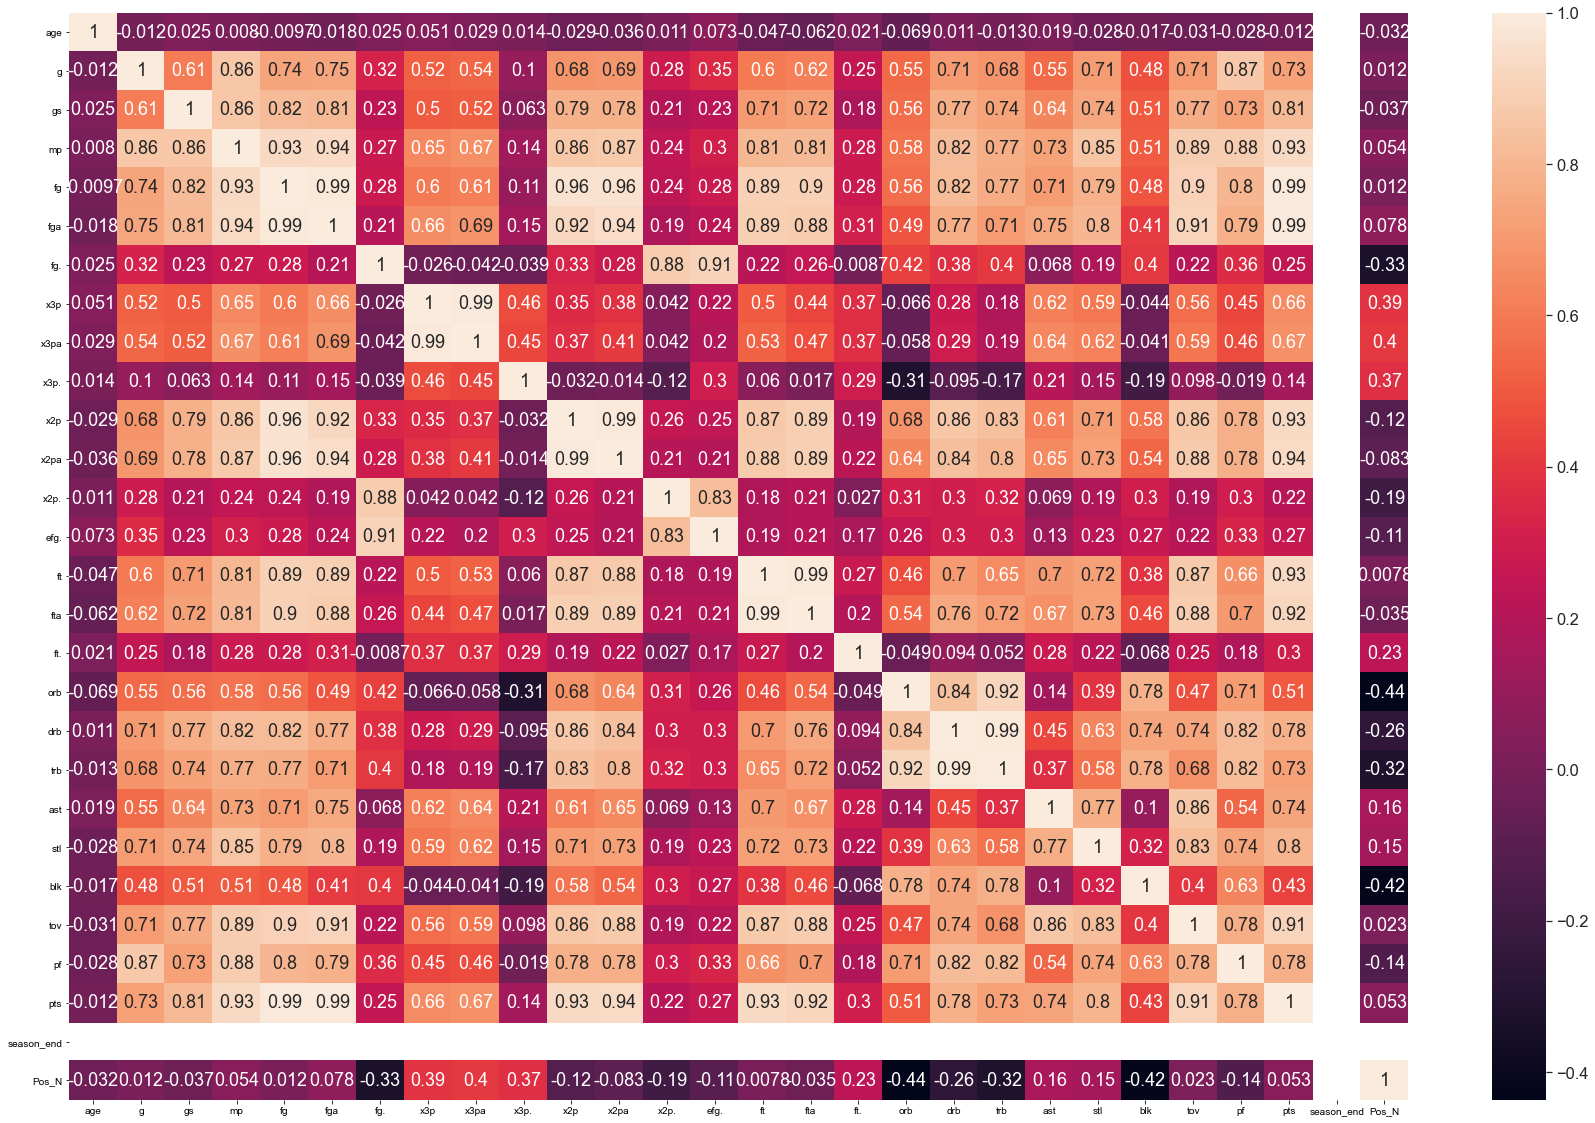

In [13]:
##Correlation plot
plt.subplots(figsize=(30,20))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(), annot=True)
plt.show()

- As per the correlation matrix the most important features which is affected in game score are variables, 'g','mp','fg','fga','season_end','drb', 'x3p','x3pa','x3p.','x2p','x2pa','x2p.','pts','pf','tov','ast','trb','orb','ft','fta','ft.'.

- when we see the correlation between fg and fga they are almost 0.99=~1 and fg. is euqal to fg/fga that gives the percentage of field goals done by the player.similarly all the percentage has been calculated i.e x3p.=x3p/x3pa , x2p.= x2p/x2pa. and similary in all other variables like x3p and x2p we are getting the 0.99 correlation that indicates approx self correlation.
- correlation between drb and trb is also 0.99=~1 and relation between orb and trb is 0.92. 
- So here, our aim is to predict how many scores nba players scored, i.e count variable so we will going to select all count variables i.e
- ft,fg,mp,x3p,x2p,pts,pf,tov,ast,trb,'g'==> 11 features selected.

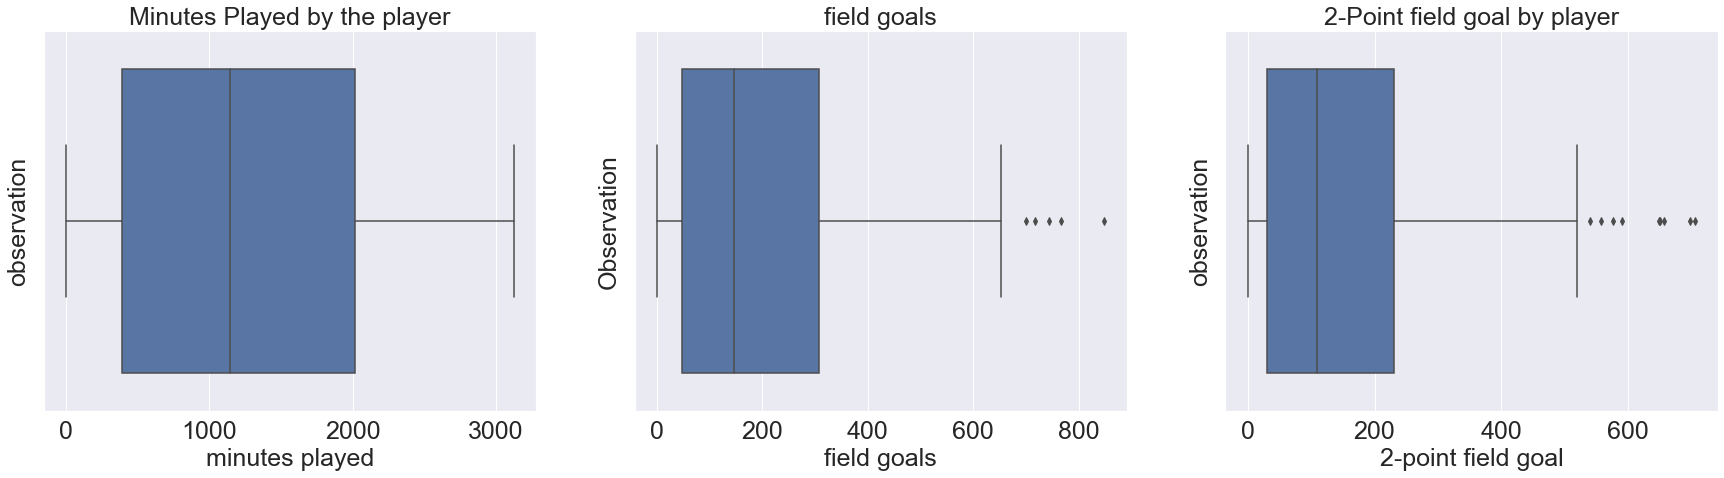

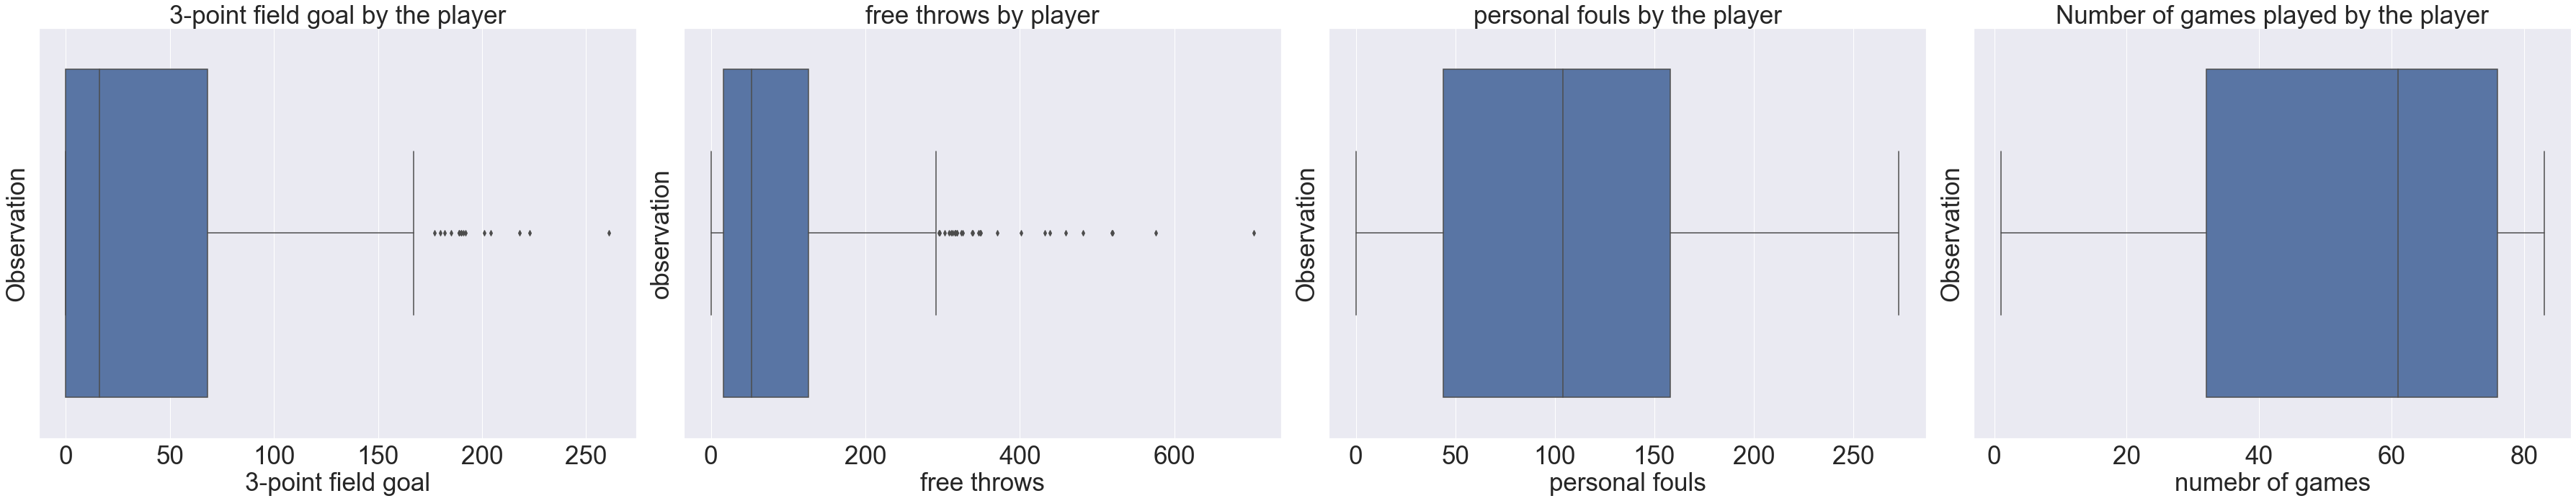

In [14]:
##Independent variables
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 7))
sns.boxplot(data['mp'], ax = ax1)     
ax1.set_xlabel('minutes played', fontsize=25)
ax1.set_ylabel('observation', fontsize=25)
ax1.set_title('Minutes Played by the player', fontsize=25)
ax1.tick_params(labelsize=25)

sns.boxplot(data['fg'], ax = ax2)     
ax2.set_xlabel('field goals', fontsize=25)
ax2.set_ylabel('Observation', fontsize=25)
ax2.set_title('field goals', fontsize=25)
ax2.tick_params(labelsize=25)

sns.boxplot(data['x2p'], ax = ax3)     
ax3.set_xlabel('2-point field goal', fontsize=25)
ax3.set_ylabel('observation', fontsize=25)
ax3.set_title('2-Point field goal by player', fontsize=25)
ax3.tick_params(labelsize=25)



fig, ( ax4, ax5, ax6,ax7) = plt.subplots(nrows = 1, ncols = 4, figsize = (50, 10))

sns.boxplot(data['x3p'], ax = ax4)    
ax4.set_xlabel('3-point field goal', fontsize=35)
ax4.set_ylabel('Observation', fontsize=35)
ax4.set_title('3-point field goal by the player', fontsize=35)
ax4.tick_params(labelsize=35)

sns.boxplot(data['ft'], ax = ax5)      
ax5.set_xlabel('free throws', fontsize=35)
ax5.set_ylabel('observation', fontsize=35)
ax5.set_title('free throws by player', fontsize=35)
ax5.tick_params(labelsize=35)

sns.boxplot(data['pf'], ax = ax6)     
ax6.set_xlabel('personal fouls', fontsize=35)
ax6.set_ylabel('Observation', fontsize=35)
ax6.set_title('personal fouls by the player', fontsize=35)
ax6.tick_params(labelsize=35)

sns.boxplot(data['g'], ax = ax7)     
ax7.set_xlabel('numebr of games', fontsize=35)
ax7.set_ylabel('Observation', fontsize=35)
ax7.set_title('Number of games played by the player', fontsize=35)
ax7.tick_params(labelsize=35)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

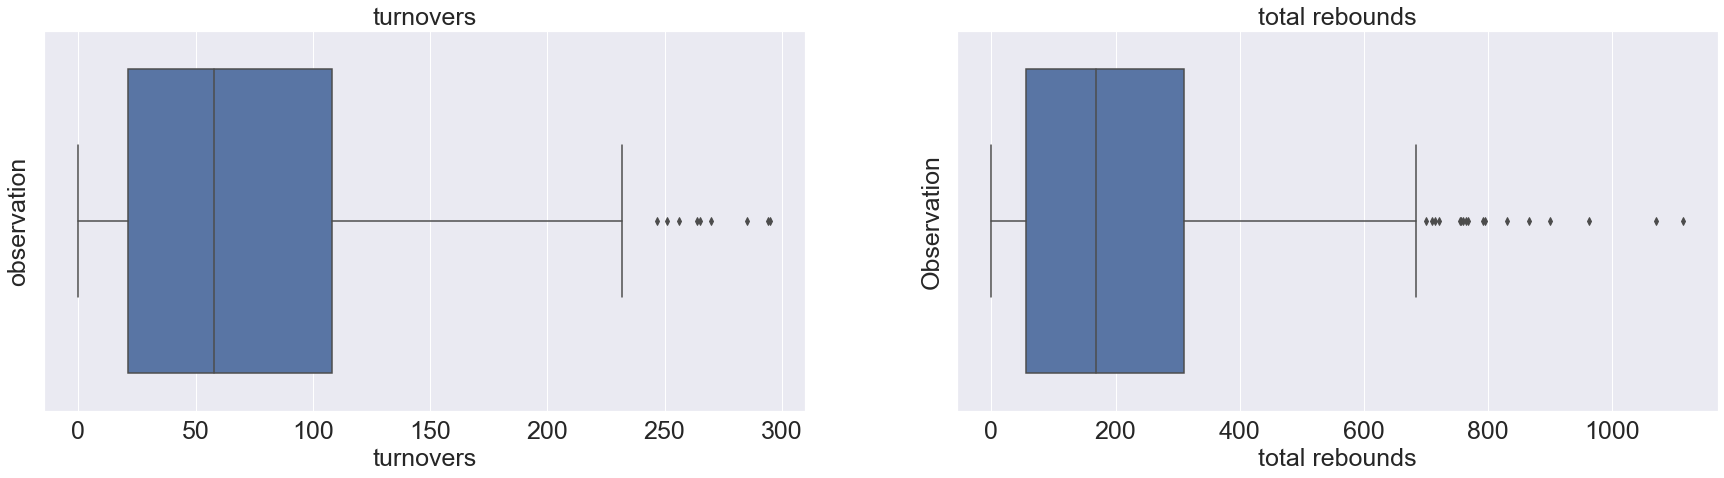

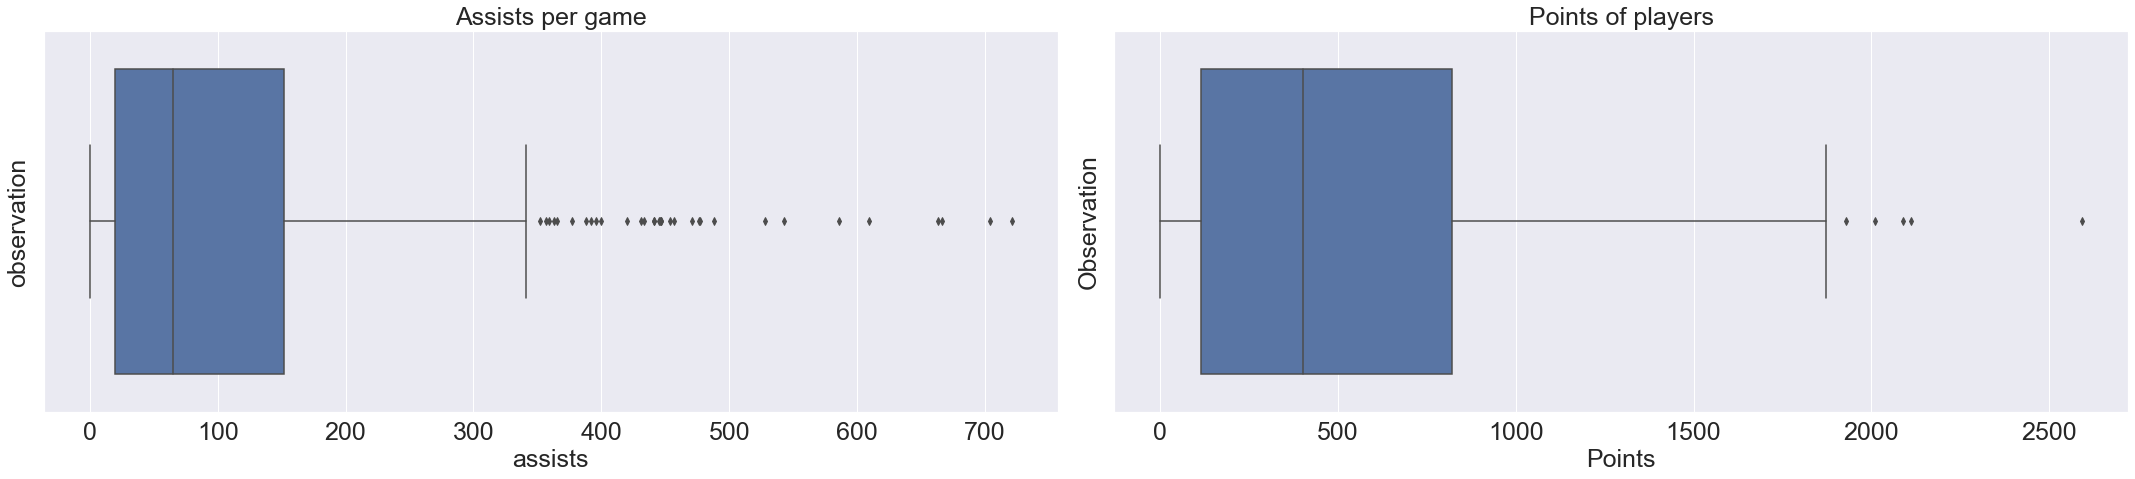

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 7))
sns.boxplot(data['tov'], ax = ax1)     
ax1.set_xlabel('turnovers', fontsize=25)
ax1.set_ylabel('observation', fontsize=25)
ax1.set_title('turnovers', fontsize=25)
ax1.tick_params(labelsize=25)

sns.boxplot(data['trb'], ax = ax2)   
ax2.set_xlabel('total rebounds', fontsize=25)
ax2.set_ylabel('Observation', fontsize=25)
ax2.set_title('total rebounds', fontsize=25)
ax2.tick_params(labelsize=25)



fig, (ax3,ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 7))

sns.boxplot(data['ast'], ax = ax3)   
ax3.set_xlabel('assists', fontsize=25)
ax3.set_ylabel('observation', fontsize=25)
ax3.set_title('Assists per game', fontsize=25)
ax3.tick_params(labelsize=25)

sns.boxplot(data['pts'], ax = ax4)    
ax4.set_xlabel('Points', fontsize=25)
ax4.set_ylabel('Observation', fontsize=25)
ax4.set_title('Points of players', fontsize=25)
ax4.tick_params(labelsize=25)



plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

- Variables 'fg(field goals)','x2p(2-point field goal)','x3p(3-point field goal)','ft(Free Throws by player)','tov(turnovers)','trb(total rebounds)','ast(assists)','pts(points)' have some outliers, we can not remove outliers here because the sample size is small i.e only 481 observations are there, so removing outliers may cause an loose of information and can affect in prediction. So instead of removing outliers here we are treating outliers.


### Outlier Treatment Using Capping Methods

In [16]:
##Outlier Treatment using capping methods For variable 'Field goals'
Q1, Q3 = data['fg'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  697


<AxesSubplot:xlabel='fg_cap'>

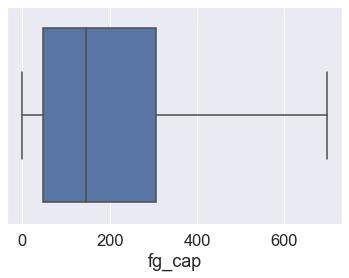

In [17]:
data["fg_cap"] = data["fg"].map(lambda x: 697 if x > 697 else x)
sns.boxplot(data['fg_cap'])

In [18]:
##Outlier Treatment using capping methods For variable '2-point field goals'
Q1, Q3 = data['x2p'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  528


<AxesSubplot:xlabel='x2p_cap'>

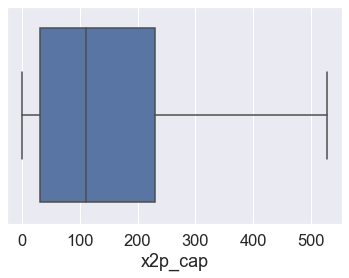

In [19]:
data["x2p_cap"] = data["x2p"].map(lambda x: 528 if x > 528 else x)
sns.boxplot(data['x2p_cap'])

In [20]:
##Outlier Treatment using capping methods For variable '3-point field goals'
Q1, Q3 = data['x3p'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  170


<AxesSubplot:xlabel='x3p_cap'>

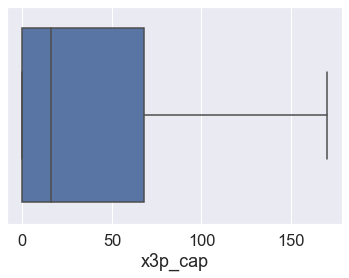

In [21]:
data["x3p_cap"] = data["x3p"].map(lambda x: 170 if x > 170 else x)
sns.boxplot(data['x3p_cap'])

In [22]:
##Outlier Treatment using capping methods For variable 'free throws'
Q1, Q3 = data['ft'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  291


<AxesSubplot:xlabel='ft_cap'>

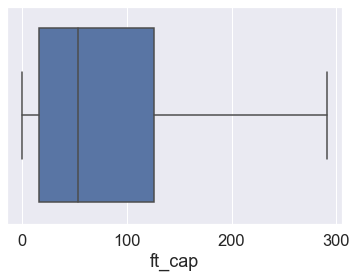

In [23]:
data["ft_cap"] = data["ft"].map(lambda x: 291 if x > 291 else x)
sns.boxplot(data['ft_cap'])

In [24]:
##Outlier Treatment using capping methods For variable 'Turnovers'
Q1, Q3 = data['tov'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  238


<AxesSubplot:xlabel='tov_cap'>

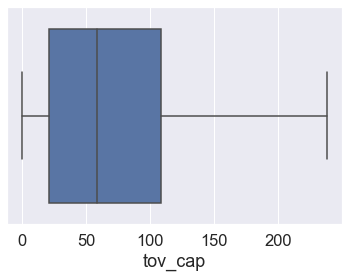

In [25]:
data["tov_cap"] = data["tov"].map(lambda x: 238 if x > 238 else x)
sns.boxplot(data['tov_cap'])

In [26]:
##Outlier Treatment using capping methods For variable 'Tota rebounds'
Q1, Q3 = data['trb'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  692


<AxesSubplot:xlabel='trb_cap'>

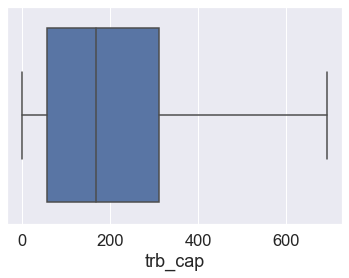

In [27]:
data["trb_cap"] = data["trb"].map(lambda x: 692 if x > 692 else x)
sns.boxplot(data['trb_cap'])

In [28]:
##Outlier Treatment using capping methods For variable 'Assists'
Q1, Q3 = data['ast'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  350


<AxesSubplot:xlabel='ast_cap'>

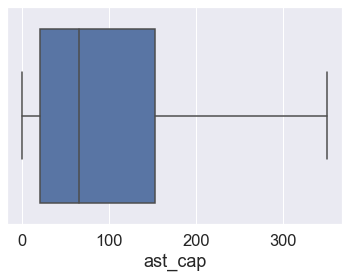

In [29]:
data["ast_cap"] = data["ast"].map(lambda x: 350 if x > 350 else x)
sns.boxplot(data['ast_cap'])

In [30]:
##Outlier Treatment using capping methods For variable 'Points'
Q1, Q3 = data['pts'].quantile([0.25,0.75])
UCL = Q3 + 1.5 * (Q3 - Q1)
print("UCL = ", round(UCL))

UCL =  1880


<AxesSubplot:xlabel='pts_cap'>

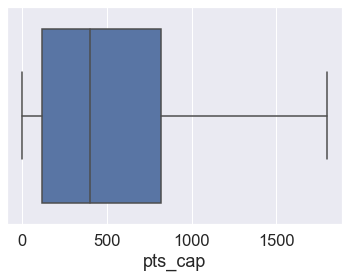

In [31]:
data["pts_cap"] = data["pts"].map(lambda x: 1800 if x > 1800 else x)
sns.boxplot(data['pts_cap'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

**missing value treatment**

In [33]:
data['efg.'].isnull().sum()  ##Checking missing observations

2

In [34]:
data['efg.'].mean()

0.4807515657620041

In [35]:
data['efg.']=data['efg.'].fillna(data['efg.'].mean())   ##Filling the missing values

#### Checking Normality

In [36]:
from scipy.stats import shapiro
data1= data.iloc[:,[4,5,6,32,33,34,16,35,36,37,38,27,39]]

print("Shapiro Normality Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

#perform Shapiro-Wilk test
statistic, p_value=shapiro(data1)

print(data ," Shapiro statistic : %.6f, p value : %.6f" % (statistic, p_value))
alpha = 0.05
if p_value > alpha:
    print(data,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(data,"variable data","is not from Normal Distribution (reject H0)")   

Shapiro Normality Test


Null Hypothesis : Sample data of the variable is from from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


             player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21      

### Checking Multicollinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data1.values, i)
                          for i in range(len(data1.columns))]
  
print(vif_data)

    feature          VIF
0         g    40.639842
1        gs    10.622841
2        mp   133.034315
3    fg_cap  1577.150168
4   x2p_cap   329.147199
5   x3p_cap    36.389699
6      efg.     7.079856
7    ft_cap    68.805671
8   tov_cap    40.376529
9   trb_cap    19.153837
10  ast_cap    15.794165
11       pf    27.686383
12  pts_cap  1465.760269


- VIF>5,10, multicollinearity exists. To solve multicollinearity issues we will use PCA: A dimension reduction technique that helps in treating multicollinearity problem.


### Normalizing the data
- As Our Data is not normal we are normalizing the data using MinMaxScaler()

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data1)
scaled_df = pd.DataFrame(data_rescaled)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.756098,0.000000,0.271067,0.094692,0.117424,0.023529,0.482,0.120275,0.126050,0.312139,0.080000,0.446886,0.095000
1,0.975610,0.243902,0.383211,0.133429,0.176136,0.000000,0.503,0.271478,0.298319,0.479769,0.122857,0.743590,0.147222
2,0.634146,0.146341,0.307594,0.205165,0.270833,0.000000,0.520,0.261168,0.163866,0.442197,0.108571,0.395604,0.201111
3,0.878049,0.890244,0.817366,0.665710,0.636364,0.752941,0.522,0.941581,0.613445,0.378613,0.708571,0.498168,0.738889
4,0.670732,0.365854,0.304390,0.195122,0.257576,0.000000,0.546,0.192440,0.264706,0.400289,0.114286,0.684982,0.182222


### Analysis

In [39]:
## splitting the data into 70-30
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12]], scaled_df.iloc[:, 1], 
                            test_size=0.3, random_state=120) 

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components =10,random_state=120)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.76041456, 0.10122952, 0.05908969, 0.03114442, 0.01501313,
       0.01068939, 0.00824991, 0.00717704, 0.00400612, 0.00246577])

In [42]:
print("components:", pca.components_)
print('\n')
print("mean:      ", pca.mean_)
print('\n')
print("covariance:", pca.get_covariance())

components: [[ 3.22981154e-01  3.49050676e-01  2.90291644e-01  3.02482712e-01
   2.15968973e-01  3.30544239e-02  3.40389439e-01  2.99033403e-01
   2.65820209e-01  3.12387480e-01  2.89474835e-01  3.04989557e-01]
 [ 6.93481335e-02  2.83477513e-03  4.20714286e-02  2.66951421e-01
  -6.76871273e-01  2.19635419e-02  1.55573468e-02 -6.53877274e-02
   4.96327692e-01 -4.20851029e-01  1.85213882e-01 -3.51295020e-02]
 [ 5.81889649e-01  1.45808058e-01 -1.08895737e-01 -2.35078020e-01
   3.45723507e-01  9.71641926e-02 -3.98748635e-01 -2.14294432e-01
   1.01455831e-01 -3.18339664e-01  3.34113557e-01 -1.25980128e-01]
 [ 3.51476193e-01 -1.03319573e-02 -2.33862253e-01 -1.25382465e-01
  -4.63374122e-01 -6.37389097e-02 -2.40603255e-01  1.94086701e-01
  -7.06284210e-02  6.35889484e-01  8.76282959e-02 -2.73102715e-01]
 [-5.04064769e-01  8.16333345e-02  8.09454645e-02  1.80897647e-02
   1.92250252e-01  6.24483837e-02 -5.85045856e-01  7.52206213e-02
   5.20539656e-01  2.53113226e-01  9.08092380e-02 -1.7446720

In [43]:
#Multiple Regression Analysis or Principal component Regression
from sklearn.linear_model import LinearRegression  
  
classifier = LinearRegression()
fit=classifier.fit(X_train, y_train)    ### model for Y=b_{0}+b_{1}*X_{1}+.......+b_{n}*X_{n} , n=1,.....11

In [44]:
y_pred = classifier.predict(X_test)
print("Training set score:{:.3f}".format(fit.score(X_train,y_train)))
print("Test set score:{:.3f}".format(fit.score(X_test,y_test)))

Training set score:0.845
Test set score:0.803


In [45]:
print("\nMSE: %.3f\n" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test, y_pred)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test- y_pred), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/y_test, axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/((y_test+y_pred)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test,y_pred))



MSE: 0.025

RMSE: 0.159

MAE: 0.117

MAPE: inf

SMAPE: 42.022

R2: 0.803



In [46]:
import statsmodels.api as sm
X_trainO = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_trainO)   ### ols model for Y (This is same as Multiple Linear Regression)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     177.3
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          3.81e-125
Time:                        23:26:36   Log-Likelihood:                 177.94
No. Observations:                 336   AIC:                            -333.9
Df Residuals:                     325   BIC:                            -291.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3220      0.008     40.746      0.0

In [47]:
## Ridge Regression
from sklearn import linear_model
reg  = linear_model.RidgeCV(
                    alphas = [ 0.9, 0.01, 0.05],
                    cv = 7)
reg.fit(X_train, y_train)

print("Best alpha: {}\n".format(reg.alpha_))
    
print("R2: %.3f" % reg.score(X_test, y_test))
y_pred = reg.predict(X_test)


Best alpha: 0.01

R2: 0.804


In [48]:
print("\nMSE: %.3f\n" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test, y_pred)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test- y_pred), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/y_test, axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/((y_test+y_pred)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test,y_pred))



MSE: 0.025

RMSE: 0.159

MAE: 0.116

MAPE: inf

SMAPE: 41.307

R2: 0.804



In [49]:
## Support Vector Regression
from sklearn.svm import SVR

reg = SVR(C = 1)
    # Train the model using the training sets
reg.fit(X_train, y_train)
    
    # Make predictions using the testing set
y_pred = reg.predict(X_test)
    
print("SCORE: \n" , reg.score(X_test,y_test))

SCORE: 
 0.816313216612924


In [50]:
print("\nMSE: %.3f\n" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test, y_pred)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test- y_pred), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/y_test, axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test - y_pred)/((y_test+y_pred)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test,y_pred))



MSE: 0.024

RMSE: 0.154

MAE: 0.107

MAPE: inf

SMAPE: 78.394

R2: 0.816



### Interpretation
SVR--Support Vector Regression model giving the good accuracy compare to other regression technique.
- Accuracy for SVR model for test data is 81.6%.
- Accuracy for Ridge model for test data is 80.4%.
- Accuracy for PCR model for test data is 80.3%.

+ In all the model(PCR,SVR,Ridge), the difference between MAE and RMSE are very less ,means that error size are less.our data and model are more representative with respect to mean and population. 
+ Treating outliers increased the accuracy percentage by 1%. if we increase sample size then possibly we will get better accuracy.